# Pymaceuticals Inc.
---

### Analysis

Did not see where the "analysis" portion of this assignment was in the grading rubrick, so I have not made one, but instead inserted the rubrick below as mentioned on the corresponding URL for challenge 5

Requirements
Prepare the Data (20 points)
The datasets are merged into a single DataFrame. (6 points)
The number of mice are shown from the merged DataFrame. (2 points)
Each duplicate mice is found based on the Mouse ID and Timepoint. (6 points)
A clean DataFrame is created with the dropped duplicate mice. (4 points)
The number of mice are shown from the clean DataFrame. (2 points)
Generate Summary Statistics (15 points)
The mean of the tumor volume for each regimen is calculated using groupby. (2 points)
The media of the tumor volume for each regimen is calculated using groupby. (2 points)
The variance of the tumor volume for each regimen is calculated using groupby. (2 points)
The standard deviation of the tumor volume for each regimen is calculated using groupby. (2 points)
The SEM of the tumor volume for each regimen is calculated using groupby. (2 points)
A new DataFrame is created with using the summary statistics. (5 points)
Create Bar Charts and Pie Charts (15 points)
A bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas is generated. (4.5 points)
A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot is generated. (4.5 points)
A pie plot showing the distribution of female versus male mice using Pandas is generated. (3 points)
A pie plot showing the distribution of female versus male mice using pyplot is generated. (3 points)
Calculate Quartiles, Find Outliers, and Create a Box Plot (30 points)
A DatFrame that has the last timepoint for each mouse ID is created using groupby. (5 points)
The index of the DataFrame is reset. (2 points)
Retrieve the maximum timepoint for each mouse. (2 points)
The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list. (3 points)
An empty list is created to fill with tumor volume data. (3 points)
A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group (10 points)
A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group. (5 points)
Create a Line Plot and a Scatter Plot (10 points)
A line plot is generated that shows the tumor volume vs. time point for one mouse treated with Capomulin. (5 points)
A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen. (5 points)
Calculate Correlation and Regression (10 points)
The correlation coefficient and linear regression model are calculated for mouse weight and average tumor volume for the Capomulin regimen. (10 points)
Grading
This assignment will be evaluated against the requirements and assigned a grade according to the following table:
 

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame (merged on the common "mouse ID column")
mouse_complete=pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [108]:
# Checking the number of mice by using .unique method and len 
mice_number=len(mouse_complete["Mouse ID"].unique())
mice_number



249

In [109]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#this means that if we count ID and timepoint as a brand new, Unique ID,
#we just have to find duplicates of these new ID;s using .duplicated and subsetting the target columns
subset_columns = ["Mouse ID", "Timepoint"]
duplicate=mouse_complete[mouse_complete.duplicated(subset=subset_columns)]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [110]:
# Optional: Get all the data for the duplicate mouse ID. 
#I guess just make a new DF that shows only Mouse ID g989? 
#just going off of what was given in this Anaconda starter file
#please note that corrupted_mice should only be changed in response to the results from the code above
corrupted_mice= "g989"
delete_df = mouse_complete[mouse_complete['Mouse ID'] == corrupted_mice]
delete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#we can do this by creating a "Boolean mask" as specified here (https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.)

mask=mouse_complete['Mouse ID'] == 'g989'
cleaned_mice=mouse_complete[~mask]
cleaned_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [112]:
# Checking the number of mice in the clean DataFrame.
new_mice_number=len(cleaned_mice["Mouse ID"].unique())
new_mice_number

248

## Summary Statistics

In [113]:
#group the dataframe by drug type
drug_sort=cleaned_mice.groupby("Drug Regimen")

#for each desired calculation, imma gonna need to make a new variable name (ugg)
mean_tumor= drug_sort["Tumor Volume (mm3)"].mean()
median_tumor=drug_sort["Tumor Volume (mm3)"].median()
var_tumor=drug_sort["Tumor Volume (mm3)"].var()
std_tumor=drug_sort["Tumor Volume (mm3)"].std()
sem_tumor=drug_sort["Tumor Volume (mm3)"].sem()

#make a new dataframe that sums up the above...
drug_stats=pd.DataFrame({
    'Mean Tumor Volume': mean_tumor,
    'Median Tumor Volume':median_tumor,
    'Variance of Tumor Volume':var_tumor,
    'Standard Deviation of Tumor Volume': std_tumor,
    'SEM of Tumor Volume':sem_tumor,
}).reset_index()

drug_stats

#in hindsight, I could have just left a note that said "Tumor Volume" = "TV" and saved some typing pain...

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [114]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#so, essientailly "for" each drug, caclucate each of the above, then group the results into a new DF by drug... got it...
#use "drug_sort" from before, then find the tumor volume 
#perform the desired calculations on each drug group
reg_stats= drug_sort['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
#reset the index like the first time...
final_stats=reg_stats.reset_index()
final_stats

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

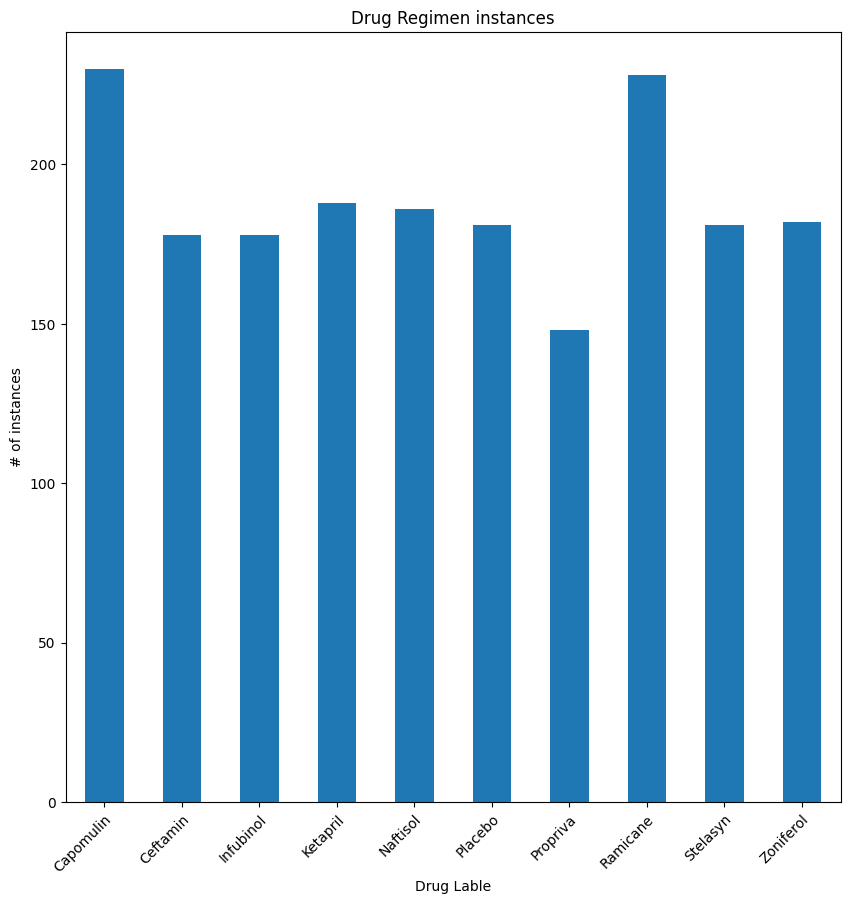

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: count, dtype: int64

In [115]:
union_data = drug_sort["Drug Regimen"].value_counts()
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#The FBI agent tracking my keystrokes is wondering why I am typing in "drug" so many times

#now to make the plot using information using info from the settlements exersize
figure1 = union_data.plot(kind="bar", figsize=(10,10),
                                title="Drug Regimen instances",
                                xlabel="Drug Lable",
                                ylabel="# of instances")

# Configure x-tick rotation
xticklabels = union_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()
union_data.head()

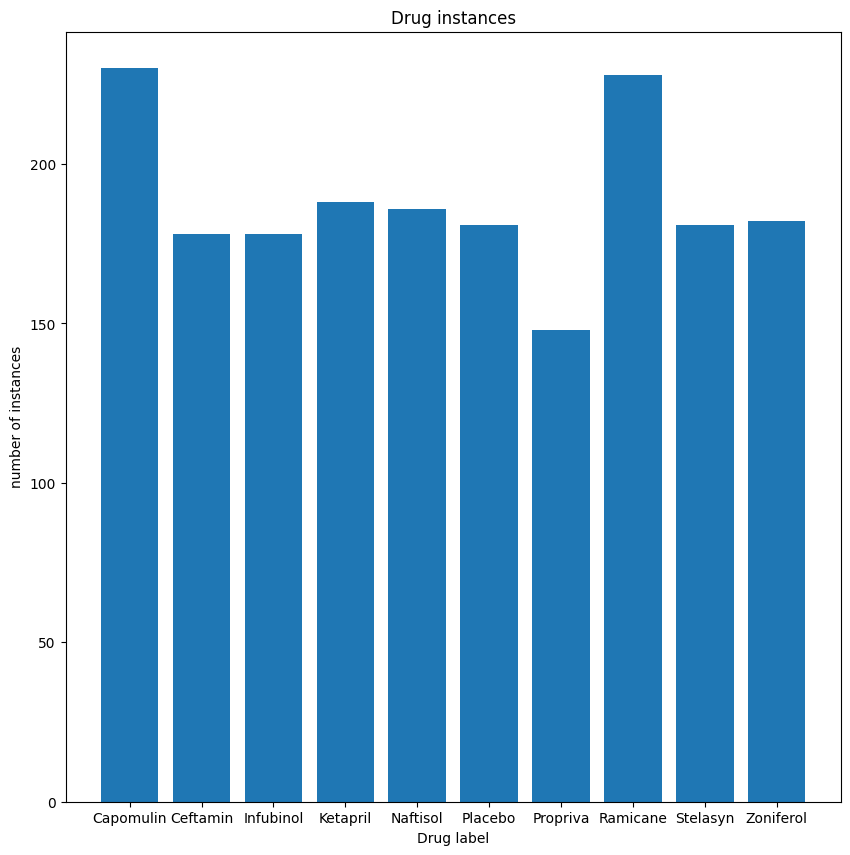

In [116]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig1=plt.figure(figsize=(10,10))
#make the bar plot using plt.bar
plt.bar(union_data.index, union_data.values)

#lable the graph table thing
plt.title('Drug instances')
plt.xlabel('Drug label')
plt.ylabel('number of instances')

plt.show()


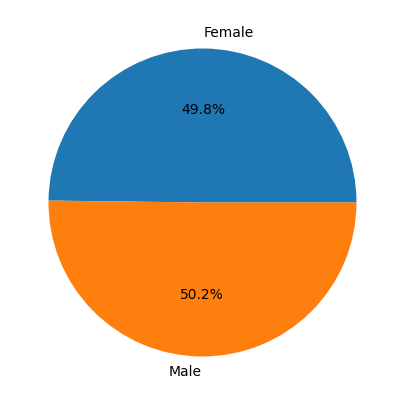

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_subset = ["Mouse ID", "Sex", "Drug Regimen", 'Tumor Volume (mm3)', 'Timepoint']
mouse_gender = mouse_complete[mouse_subset]

#take this table and delete (drop) all duplicate mouse ID's and corresponding gender data. 
mouse_gender2=mouse_gender.drop_duplicates(subset=["Mouse ID", "Sex"], keep = 'first' )

#now tally the number of males vs females using .value_counts
count = mouse_gender2.groupby('Sex').size()

#mouse_gender2

count
#make a pie plot using PANDAS
#totally ripping off the code from here https://www.educative.io/answers/pie-plots-in-pandas
#and here to get the percentage to show https://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php#:~:text=To%20add%20percentages%20to%20each,percentage%20to%20the%20tenth%20place.&text=This%20gets%20rid%20of%20the%20tilt%20from%20the%20pie%20chart.

pieplot = count.plot.pie(y= "Sex", figsize = (5,5),autopct='%1.1f%%', legend = False)


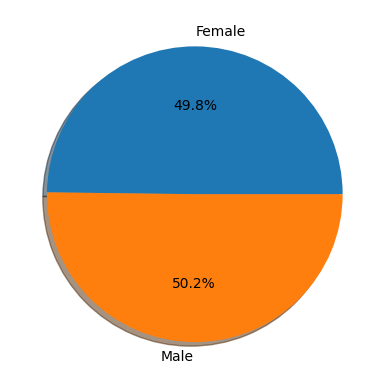

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Thank you w3schools (https://www.w3schools.com/python/matplotlib_pie_charts.asp)
#abusing the "count" df from earliear
y = count
mylabels = ["Female", "Male"]

plt.pie(y, labels = mylabels, shadow = True, autopct='%1.1f%%')
plt.show() 

#DO I GET EXTRA POINTS FOR ADDING SHADOWS?

## Quartiles, Outliers and Boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_gender3=mouse_gender.drop_duplicates(subset=["Mouse ID", "Sex"], keep = 'last' )
#mouse_gender3
columns_to_merge_on = ['Mouse ID', 'Timepoint', "Drug Regimen","Tumor Volume (mm3)","Sex" ]
#now drop all rows not containing Capomulin, Ramicane, Infubinol, and Ceftamin by first defining the desired values
desired_values = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#then using .isin to target the desired values
mouse_gender_4 = mouse_gender3[mouse_gender3["Drug Regimen"].isin(desired_values)]
mouse_gender_4
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_mouse_info = mouse_gender_4.merge(cleaned_mice, on=columns_to_merge_on, how="left")
combined_mouse_info

,Mouse ID,Sex,Drug Regimen,Tumor Volume (mm3),Timepoint,Metastatic Sites,Age_months,Weight (g)
0,b128,Female,Capomulin,38.982878,45,2,9,22
1,c326,Female,Infubinol,36.321346,5,0,18,25
2,c139,Male,Infubinol,72.226731,45,2,11,28
3,v339,Male,Infubinol,46.250112,5,0,20,26
4,a577,Female,Infubinol,57.031862,30,2,6,25
...,...,...,...,...,...,...,...,...
95,t565,Female,Capomulin,34.455298,45,0,20,17
96,i557,Female,Capomulin,47.685963,45,1,1,24
97,m957,Female,Capomulin,33.329098,45,1,3,19
98,f966,Male,Capomulin,30.485985,20,0,16,17


In [120]:
# Put treatments into a list for for loop (and later for plot labels)(ok)
Drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# make a llist for tumor volume
size_of_tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outlier

# had to look up that IQR means Interquartile Range 
for drug in Drugs: 
    tumorsize = combined_mouse_info.loc[combined_mouse_info["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    #subset 
    size_of_tumor.append(tumorsize)
    
    # find potential_outlier using upper and lowerbounds
    quartiles = tumorsize.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    potential_outlier = tumorsize.loc[(tumorsize < lower_bound) | (tumorsize > upper_bound)]
    print(f"{drug}'s potential outlier {potential_outlier}")


Capomulin's potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)


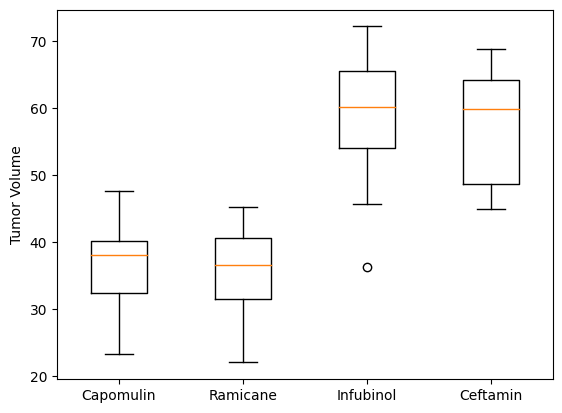

In [121]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/ was very helpful here 


fig=dict(markerfacecolor='blue',markersize=100)
# Creating plot
plt.boxplot(size_of_tumor,labels = Drugs)
plt.ylabel('Tumor Volume')
 
# show plot
plt.show()




## Line and Scatter Plots

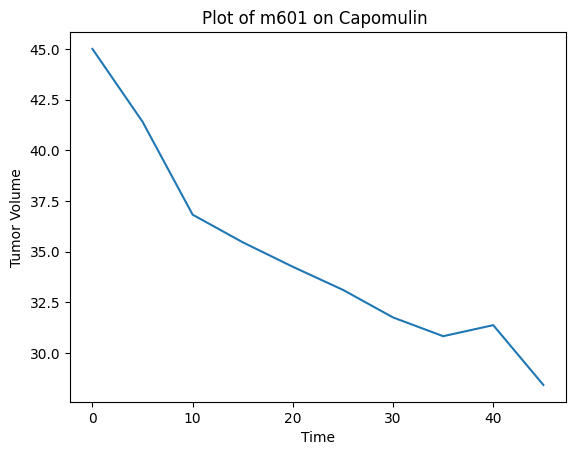

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#I will not spell out that drug
cap_info= cleaned_mice.loc[cleaned_mice['Drug Regimen']=='Capomulin']
#If I had a quarter for every "drug" and "mouse" Refference in this code...
#copy the format from above to target the individual mouse m601
single_mouse_info=cap_info.loc[cap_info['Mouse ID']=="m601"]
#now to make the table using the code from https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.03-Line-Plots/#:~:text=To%20create%20a%20line%20plot,end%20to%20show%20the%20plot.
plt.title(f'Plot of m601 on Capomulin ')
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
plt.plot(single_mouse_info['Timepoint'],single_mouse_info['Tumor Volume (mm3)'])
plt.show()




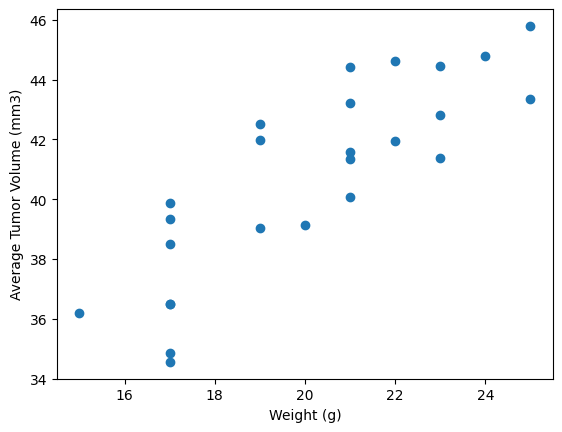

In [123]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#1st copy the info I used to target the drug
cap_info= cleaned_mice.loc[cleaned_mice['Drug Regimen']=='Capomulin']
#use .mean method to find average tumor volume and weight per mouse
tumor_avg = cap_info.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(
    tumor_avg['Weight (g)'],
    tumor_avg['Tumor Volume (mm3)']
)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

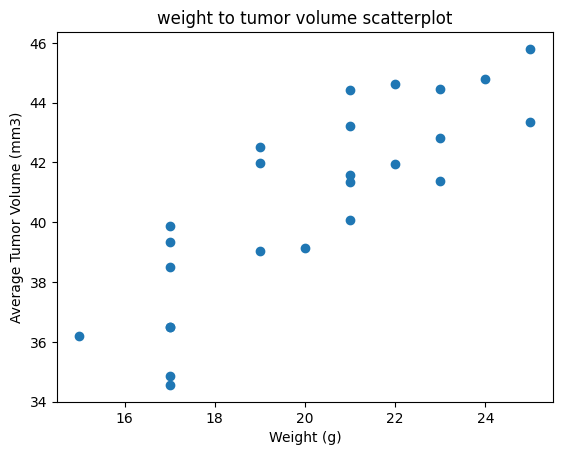

In [124]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#translation based off the available graph... take the code for the graph above and draw a line through it

#1st copy the info I used to target the drug
cap_info= cleaned_mice.loc[cleaned_mice['Drug Regimen']=='Capomulin']
#use .mean method to find average tumor volume and weight per mouse
tumor_avg = cap_info.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(
    tumor_avg['Weight (g)'],
    tumor_avg['Tumor Volume (mm3)']
)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('weight to tumor volume scatterplot')



plt.show()

